<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/Model_Evaluation_Recall_precision_classification_decision_Random_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Problem Statement:




Given the credit card transaction dataset, make a model to predict transactions are fradulent or not using random forest algorithm. 

Evaluate the model using possible model evaluation techniques.



*   **Data Loading and Description:**




The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 38 frauds out of 10000 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.0038% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1__ in case of __fraud and 0 otherwise.

False Positive are the cases where the we would predict that the transaction would be fraudulent whereas actually it wont be.
False Negative would be the case when we would predict that transaction is not fradulent but actually it would be fraudulent.

Now, there's a need to reduce both false positive and false negative, but simultaneous reduction of these two is not possible. So, we need to trade off one of them. 

Thinking from the perspective of the company, minimising False negative cases is of prime concern as letting go fradulent transaction would lead to monetary loss and customer dissatisfaction whereas classifying non-fradulent transactions as fraud would just involve transaction validation by contacting the customer via call or email, and it wouldnt cost much to the company as compared to the case where there can be huge monetary loss due to fraudulent transaction.



*   Importing packages:



In [0]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [0]:
fraud=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/credit_fraud.csv")

In [3]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
fraud.shape

(10000, 31)

In [5]:
fraud.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,-0.222998,0.766066,-1.272513,0.851410,0.700597,-0.129634,-0.007757,0.318991,-0.016074,-0.070415,0.027511,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,1.093548,1.168600,1.527660,1.213055,1.239290,0.975573,0.882057,0.966392,0.794259,0.808373,0.589994,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,-0.688422,-0.063689,-2.368115,-0.017984,0.080400,-0.709531,-0.495536,-0.180029,-0.450302,-0.552134,-0.149981,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,-0.340720,0.746752,-1.621015,0.919134,0.899792,-0.010078,0.066086,0.297423,0.025225,-0.077208,-0.021415,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,0.174295,1.576540,0.082667,1.768889,1.499211,0.533501,0.547399,0.782865,0.459390,0.442908,0.156534,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


In [7]:
fraud["Class"].value_counts()

0    9962
1      38
Name: Class, dtype: int64

In [8]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
Time      10000 non-null int64
V1        10000 non-null float64
V2        10000 non-null float64
V3        10000 non-null float64
V4        10000 non-null float64
V5        10000 non-null float64
V6        10000 non-null float64
V7        10000 non-null float64
V8        10000 non-null float64
V9        10000 non-null float64
V10       10000 non-null float64
V11       10000 non-null float64
V12       10000 non-null float64
V13       10000 non-null float64
V14       10000 non-null float64
V15       10000 non-null float64
V16       10000 non-null float64
V17       10000 non-null float64
V18       10000 non-null float64
V19       10000 non-null float64
V20       10000 non-null float64
V21       10000 non-null float64
V22       10000 non-null float64
V23       10000 non-null float64
V24       10000 non-null float64
V25       10000 non-null float64
V26       10000 non-null float64
V27

In [9]:
fraud.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler
std_scalar=StandardScaler()
rob_scalar=RobustScaler()

In [0]:
fraud["scaled_amount"]=rob_scalar.fit_transform(fraud["Amount"].values.reshape(-1,1))

In [0]:
fraud["scaled_Time"]=rob_scalar.fit_transform(fraud["Time"].values.reshape(-1,1))

In [13]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_Time
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,2.908399,-0.559218
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.288512,-0.559218
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,7.891862,-0.559096
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,2.340078,-0.559096
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.175805,-0.558973


In [14]:
fraud.drop(["Amount","Time"],axis=1,inplace=True)
fraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,2.908399,-0.559218
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.288512,-0.559218
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,7.891862,-0.559096
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,2.340078,-0.559096
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,1.175805,-0.558973


In [15]:
fraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,2.908399,-0.559218
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.288512,-0.559218
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,7.891862,-0.559096
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,2.340078,-0.559096
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,1.175805,-0.558973


In [16]:
fraud["scaled_Time"]

0      -0.559218
1      -0.559218
2      -0.559096
3      -0.559096
4      -0.558973
          ...   
9995    1.279027
9996    1.279395
9997    1.279885
9998    1.280130
9999    1.280375
Name: scaled_Time, Length: 10000, dtype: float64

In [119]:
fraud=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/credit_fraud.csv")
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

fraud['scaled_amount'] = rob_scaler.fit_transform(fraud['Amount'].values.reshape(-1,1))
fraud['scaled_time'] = rob_scaler.fit_transform(fraud['Time'].values.reshape(-1,1))

fraud.drop(['Time','Amount'], axis=1, inplace=True)

In [121]:
scaled_amount = fraud['scaled_amount']
scaled_time = fraud['scaled_time']

fraud.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
fraud.insert(0, 'scaled_amount', scaled_amount)
fraud.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

fraud.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.908399,-0.559218,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.288512,-0.559218,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,7.891862,-0.559096,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,2.340078,-0.559096,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,1.175805,-0.558973,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [122]:
fraud.drop(["Amount","Time"],axis=1,inplace=True)

KeyError: ignored

In [123]:
amount=fraud["scaled_amount"]
time=fraud["scaled_Time"]

KeyError: ignored

In [3]:
amount.head()

NameError: ignored

In [0]:
fraud.drop(["scaled_amount","scaled_Time"],axis=1,inplace=True)

In [116]:
fraud.head()

NameError: ignored

In [0]:
fraud.insert(0,"Amount",amount)
fraud.insert(1,"time",time)
fraud.head()

In [0]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()


In [0]:
x=fraud.loc[:,fraud.columns!="Class"]
y=fraud.loc[:,fraud.columns=="Class"]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [128]:
x_train.shape


(7500, 30)

In [129]:
y_train.shape

(7500, 1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)

In [131]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred=model.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score

In [134]:
accuracy_score(y_test,y_pred)

0.9992

In [0]:
model2=RandomForestClassifier(criterion='entropy',
                                n_estimators=15,
                                random_state = 0,
                                max_depth=3,
                                min_samples_split=5,
                                min_samples_leaf=4,
                                max_leaf_nodes=5,
                                n_jobs=-1,)

In [136]:
model2.fit(x_train,y_train)
y_pred_1=model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
accuracy_score(y_test,y_pred_1)

In [0]:
from sklearn.metrics import confusion_matrix

In [138]:
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,y_pred))
print(confusion_matrix)



      0  1
0  2493  0
1     2  5


In [0]:
y_pred=pd.DataFrame()
y_pred_1=pd.DataFrame()

In [140]:
confusion_matrix(y_test,y_pred_1)

TypeError: ignored

In [0]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [142]:
print(precision_score(y_test,y_pred_1))


ValueError: ignored

In [143]:
y_train.shape

(7500, 1)

In [144]:
x_train.shape

(7500, 30)

In [145]:
x_test.shape

(2500, 30)

In [146]:
y_test.shape

(2500, 1)

In [147]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test,y_pred))
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test,y_pred_1))

ValueError: ignored

In [148]:
X = fraud.loc[:,fraud.columns != 'Class']
X.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,2.908399,-0.559218,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.288512,-0.559218,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,7.891862,-0.559096,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,2.340078,-0.559096,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,1.175805,-0.558973,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [149]:
y = fraud.loc[:,fraud.columns == 'Class']
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state = 0)

In [0]:
model2 = RandomForestClassifier(criterion='entropy',
                                n_estimators=15,
                                random_state = 0,
                                max_depth=3,
                                min_samples_split=5,
                                min_samples_leaf=4,
                                max_leaf_nodes=5,
                                n_jobs=-1,
                                )

In [153]:
model1.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
model2.fit(X_train,y_train)

In [0]:
prediction1 = pd.DataFrame()
prediction1 = model1.predict(X_test)

In [0]:
prediction2 = pd.DataFrame()
prediction2 = model2.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with model 1 is:',accuracy_score(y_test, prediction1))
print('Accuracy score for test data with model 2 is:',accuracy_score(y_test, prediction2))

NameError: ignored

In [157]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction1))
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction2))

NameError: ignored

In [158]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,prediction1)
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,prediction2)
print('Precision score for test data using model2 is:', precision2)

NameError: ignored

In [159]:
loan=pd.read_csv("https://github.com/insaid2018/CDF-Certification-Quiz-Data/tree/master/Bank1/01-Data-Dictionary.csv")

ParserError: ignored

In [0]:
loans=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/loan_data.csv")

In [161]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [162]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [163]:
loans.shape

(9578, 14)

In [164]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [0]:
loans.describe()

In [0]:
loans.isnull().sum()

In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/CDF-Certification-Quiz-Data/master/Abalone/02-Data.csv")

In [103]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Adult
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,M,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [105]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Adult             0
dtype: int64

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Adult             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [107]:
data.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Adult
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,0


In [0]:
data.drop(["Sex"],axis=1,inplace=True)

In [0]:
x=data.loc[:,data.columns!="Adult"]
y=data["Adult"]

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)

In [0]:
from sklearn.linear_model import  LogisticRegression

In [112]:
model=LogisticRegression()
model.fit(x_train,y_train)

ValueError: ignored

In [113]:
y_pred_test=model.predict(x_test)

NotFittedError: ignored

In [0]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy_score(y_test,y_pred_test)

ValueError: ignored

In [82]:
data2=pd.read_csv("https://raw.githubusercontent.com/insaid2018/CDF-Certification-Quiz-Data/master/Bank1/02-Data.csv")
data2.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2018)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
model=DecisionTreeClassifier(random_state=2019)

In [86]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2019, splitter='best')

In [0]:
y_pred_test=model.predict(x_test)

In [0]:
from sklearn.metrics import recall_score

In [90]:
recall_score(y_test,y_pred_test)

0.2605042016806723

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,y_pred_test))

In [93]:
print(confusion_matrix)

      0    1
0  2006  392
1   352  124


In [94]:
data2=pd.read_csv("https://raw.githubusercontent.com/insaid2018/CDF-Certification-Quiz-Data/master/Bank1/02-Data.csv")
data2.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2018)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model=RandomForestClassifier(random_state=0)

In [98]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [99]:
model.feature_importances_

array([0.01934586, 0.10256215, 0.11475348, 0.11105562, 0.11047726,
       0.07892347, 0.11146791, 0.10958937, 0.11059976, 0.05387886,
       0.01422548, 0.01000324, 0.00852258, 0.01521167, 0.00637402,
       0.00759536, 0.00482015, 0.01059374])

In [101]:
print(data2["Age"])

0       25
1       45
2       39
3       35
4       35
        ..
4995    29
4996    30
4997    63
4998    65
4999    28
Name: Age, Length: 5000, dtype: int64


In [100]:
data2[(data2["Age"]==32)]

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
42,43,32,7,132,4,1.1,2,412,1,0,0,1,0
50,51,32,8,8,4,0.7,2,0,0,1,0,1,0
119,120,32,7,112,1,4.6,1,366,0,0,0,0,0
158,159,32,6,79,2,1.5,3,0,0,0,0,1,1
200,201,32,6,29,1,1.9,3,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4777,4778,32,8,30,4,0.4,2,78,0,0,0,1,0
4819,4820,32,6,41,3,0.9,1,179,0,0,0,0,0
4824,4825,32,6,25,3,1.0,1,0,0,0,0,1,0
4963,4964,32,6,98,2,4.5,3,306,0,0,0,0,0


In [4]:
import pandas as pd
loans=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/loan_data.csv")
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [6]:
loans.shape

(9578, 14)

In [7]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [10]:
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2986a94358>]],
      dtype=object)

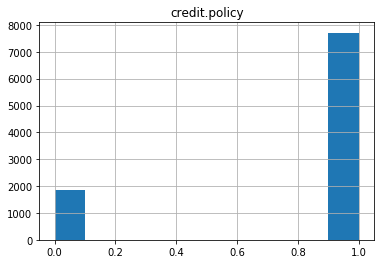

In [11]:
loans.hist("credit.policy")

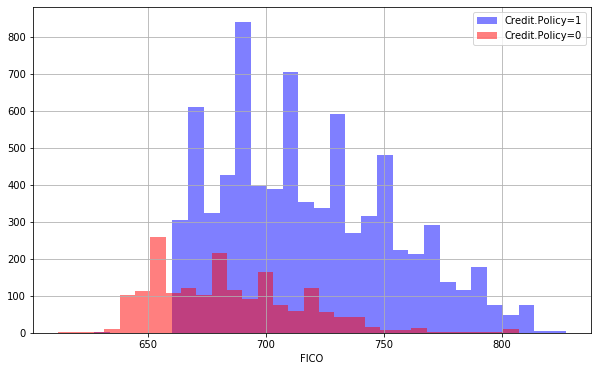

In [12]:
import matplotlib.pyplot as plt
def tree():
    plt.figure(figsize=(10,6))
    loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
    loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
    plt.legend()
    plt.xlabel('FICO')
tree()

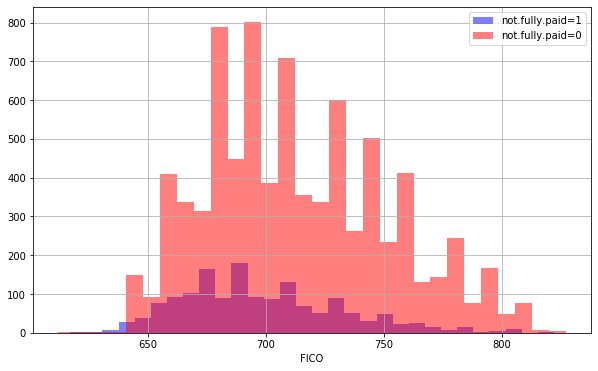

In [13]:
import matplotlib.pyplot as plt
def tree():
    plt.figure(figsize=(10,6))
    loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
    loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
    plt.legend()
    plt.xlabel('FICO')
tree()

In [14]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [0]:
import seaborn as sns

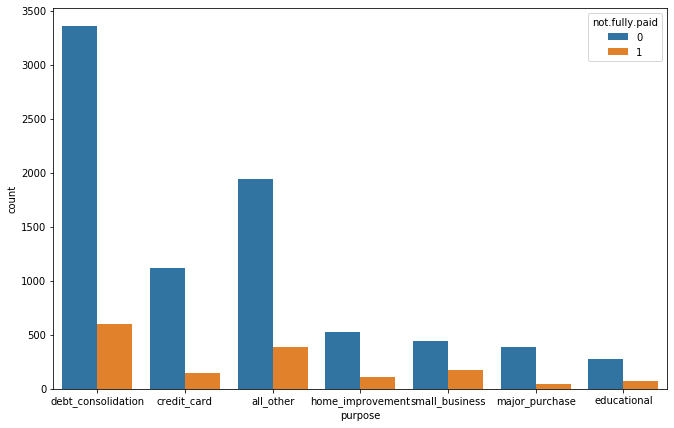

In [16]:
plt.figure(figsize=(11,7))
sns.countplot(x=loans.purpose,hue="not.fully.paid",data=loans)

In [17]:
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [0]:
cat_feats=["purpose"]

In [0]:
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [21]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [0]:
x=final_data.loc[:,final_data.columns!="not.fully.paid"]
y=final_data["not.fully.paid"]

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

In [24]:
x_train.shape

(6704, 18)

In [25]:
y_train.shape

(6704,)

In [26]:
x_test.shape

(2874, 18)

In [27]:
y_test.shape

(2874,)

In [29]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
prediction=pd.DataFrame()
prediction=model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.732776617954071

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,prediction))

In [36]:
confusion_matrix

,0,1
0,1992,439
1,329,114


In [0]:
from sklearn.metrics import recall_score

In [38]:
recall_score(y_test,prediction)

0.25733634311512416

In [0]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.21      0.26      0.23       443

    accuracy                           0.73      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.76      0.73      0.74      2874



**Instantiate Decision Tree Classifer using scikit learn having (criterion='entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4)**

In [0]:
model1=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4)

In [48]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
prediction_y_test=model1.predict(x_test)

In [50]:
accuracy_score(y_test,prediction_y_test)

0.8458594293667363

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,prediction_y_test))
confusion_matrix

,0,1
0,2431,0
1,443,0


In [51]:
recall_score(y_test,prediction_y_test)

0.0

In [54]:
print(classification_report(y_test,prediction_y_test))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest Classifier**

**Instantiate Random Forest Classifier using scikit learn having n_estimators = 600**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model2=RandomForestClassifier(n_estimators = 600)

In [57]:
model2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:

y_pred_test_random=model2.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred_test_random)

0.8458594293667363

In [60]:
recall_score(y_test,y_pred_test_random)

0.01805869074492099

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,y_pred_test_random))
confusion_matrix

,0,1
0,2423,8
1,435,8


In [72]:
print(classification_report(y_test,y_pred_test_random))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



**Instantitate Random Forest Model using scikit learn having (criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5)**

In [0]:
model3=RandomForestClassifier(criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5)

In [74]:
model3.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
prediction3=model3.predict(x_test)

In [76]:
accuracy_score(y_test,prediction3)

0.8458594293667363

In [77]:
recall_score(y_test,prediction3)

0.0

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,prediction3))
print(confusion_matrix)

      0  1
0  2431  0
1   443  0


In [81]:
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
